# **EMPLOYEE PROMOTION PREDICTION**
## ***Which employees will be promoted?***
Created by: Nailatul Fadhilah<br>
Email: nailatulfadhilah12@gmail.com
![alt text](https://pngimage.net/wp-content/uploads/2018/06/pengangguran-png-9.png)

# Business Understanding
Problem statement:
* Melakukan analisis pada data untuk mendapatkan insight dari data
* Membuat model machine learning untuk memprediksi apakah karyawan akan mendapatkan promosi atau tidak

# Importing Libraries

In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.utils import resample

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Data

In [3]:
#Loading data dictionary
df_dict = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HR Data/dataset_test_ds.xlsx', 
                        sheet_name='data_dictionary', header=1)
df_dict = df_dict.drop(['Unnamed: 0'], axis =1)
df_dict = df_dict.iloc[1:,:]
df_dict

,atribut,deskripsi
1,id_karyawan,id karyawan
2,departemen,departemen tempat karyawan bekerja (contoh: Sa...
3,wilayah,wilayah kerja karyawan
4,pendidikan,tingkat pendidikan karyawan
5,jenis_kelamin,jenis kelamin karyawan
6,rekrutmen,jalur rekrutmen
7,jumlah_training,jumlah pelatihan yang diselesaikan oleh karyaw...
8,umur,umur karyawan
9,rating_tahun_lalu,rating karyawan tahun lalu
10,masa_kerja,masa bekerja karyawan dalam tahun


In [4]:
#Loading data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HR Data/dataset_test_ds.xlsx', sheet_name='dataset_test_ds')
df.head()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Data Understanding

In [5]:
#Shape of the data
df.shape

(54808, 14)

In [6]:
df.columns

Index(['id_karyawan', 'departemen', 'wilayah', 'pendidikan', 'jenis_kelamin',
       'rekrutmen', 'jumlah_training', 'umur', 'rating_tahun_lalu',
       'masa_kerja', 'KPI_>80%', 'penghargaan', 'rata_rata_skor_training',
       'dipromosikan'],
      dtype='object')

In [7]:
#Check the data type and missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               52399 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  object 
 6   jumlah_training          54808 non-null  int64  
 7   umur                     54808 non-null  int64  
 8   rating_tahun_lalu        50684 non-null  float64
 9   masa_kerja               54808 non-null  int64  
 10  KPI_>80%                 54808 non-null  int64  
 11  penghargaan              54808 non-null  int64  
 12  rata_rata_skor_training  54808 non-null  int64  
 13  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(8

In [8]:
#General descriptive statistics for numerical data types
df.describe()

,id_karyawan,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,54346.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,15152.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,34820.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,54376.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,73881.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,93449.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
#General descriptive statistics for categorical data types
df.describe(include='object')

,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,wilayah_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [10]:
#first 5 rows
df.head()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Kesimpulan:
* Terdapat 54808 baris data dan 14 kolom.
* Categorical features:'departemen', 'wilayah', 'pendidikan', 'jenis_kelamin', 'rekrutmen', 'rating_tahun_lalu', 'KPI_>80%', 'penghargaan', 'dipromosikan'
* Binary class categories:'jenis_kelamin', 'KPI_>80%', 'penghargaan', 'dipromosikan'
* Continous features: 'jumlah_training', 'umur', 'masa_kerja', 'rata_rata_skor_training'
* Kolom 'dipromosikan' adalah variable target atau dependent feature.
* Sedangkan kolom yang lain adalah independent features.

# Data Cleaning

## Detecting Missing Value

In [11]:
#Function to check missing value
def missingvalue(data):
    missing_value = data.isnull().sum(axis = 0).reset_index()
    missing_value.columns = ['variable', 'number_of_missing']
    missing_value['percentage_of_missing'] = (missing_value['number_of_missing'])/data.shape[0]*100
    mv = missing_value.sort_values('percentage_of_missing', ascending = False).reset_index(drop=True)
    return mv

In [12]:
#Checking missing value for df
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,rating_tahun_lalu,4124,7.524449
1,pendidikan,2409,4.395344
2,id_karyawan,0,0.000000
3,departemen,0,0.000000
4,wilayah,0,0.000000
5,jenis_kelamin,0,0.000000
6,rekrutmen,0,0.000000
7,jumlah_training,0,0.000000
8,umur,0,0.000000
9,masa_kerja,0,0.000000


Kolom yang terdapat missing value:
* rating_tahun_lalu = 7,52% dari data
* pendidikan = 4,39% dari data

### Handling Missing Value - 'rating_tahun_lalu'

In [13]:
#Unique value in 'rating_tahun_lalu' column
df['rating_tahun_lalu'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [14]:
#Check the condition of the data where column 'rating_tahun_lalu' has missing value
miss_rating = df[df['rating_tahun_lalu'].isnull()]
miss_rating.head()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
10,45085,Technology,wilayah_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,86328,Procurement,wilayah_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,89910,Sales & Marketing,wilayah_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,60860,Sales & Marketing,wilayah_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,41750,Sales & Marketing,wilayah_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0


In [15]:
#Check the 'masa_kerja' value in the miss_rating data
miss_rating['masa_kerja'].unique()

array([1])

Dapat diambil kesimpulan bahwa missing value pada kolom 'rating_tahun_lalu' dapat disebabkan karena karyawan baru bergabung ke perusahaan setelah evaluasi rating dilakukan. Terlihat bahwa semua 'masa_kerja' pada table miss_rating bernilai 1.<br>
Missing value akan diisi dengan nilai 0, sehingga tidak mengubah makna dari data yang ada

In [16]:
#Filling missing value with 0
df['rating_tahun_lalu'] = df['rating_tahun_lalu'].fillna(0)

In [17]:
#Change data type of 'rating_tahun_lalu' column from float to integer
df['rating_tahun_lalu'] = df['rating_tahun_lalu'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_karyawan              54808 non-null  int64 
 1   departemen               54808 non-null  object
 2   wilayah                  54808 non-null  object
 3   pendidikan               52399 non-null  object
 4   jenis_kelamin            54808 non-null  object
 5   rekrutmen                54808 non-null  object
 6   jumlah_training          54808 non-null  int64 
 7   umur                     54808 non-null  int64 
 8   rating_tahun_lalu        54808 non-null  int64 
 9   masa_kerja               54808 non-null  int64 
 10  KPI_>80%                 54808 non-null  int64 
 11  penghargaan              54808 non-null  int64 
 12  rata_rata_skor_training  54808 non-null  int64 
 13  dipromosikan             54808 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5

### Handling Missing Value - 'pendidikan'

In [18]:
#Unique value in 'pendidikan' column
df['pendidikan'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

Missing value pada kolom 'pendidikan' dapat disebabkan karena kesalahan pada saat pengisian data atau jenis pendidikan karyawan tidak ada di daftar.
<br>
Missing value pada kolom 'pendidikan' akan diisi dengan 'Others' yang dapat mencakup gelar pendidikan seperti politeknik (diploma), atau pendidikan lain antara Secondary dan Bachelors.

In [19]:
#Filling missing value with 'Others'
df['pendidikan'] = df['pendidikan'].fillna('Others')

In [20]:
#Checking the missing value in the df again
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,id_karyawan,0,0.0
1,departemen,0,0.0
2,wilayah,0,0.0
3,pendidikan,0,0.0
4,jenis_kelamin,0,0.0
5,rekrutmen,0,0.0
6,jumlah_training,0,0.0
7,umur,0,0.0
8,rating_tahun_lalu,0,0.0
9,masa_kerja,0,0.0


Sudah tidak ada missing value pada data yang digunakan

## Checking Duplicate

In [21]:
#Checking duplicate
df[df.duplicated()]

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan


Tidak ada duplikat pada data yang digunakan.

# Exploratory Data Analysis

## How many employees got promoted?

Percentage of customer churn:
0    91.48
1     8.52
Name: dipromosikan, dtype: float64


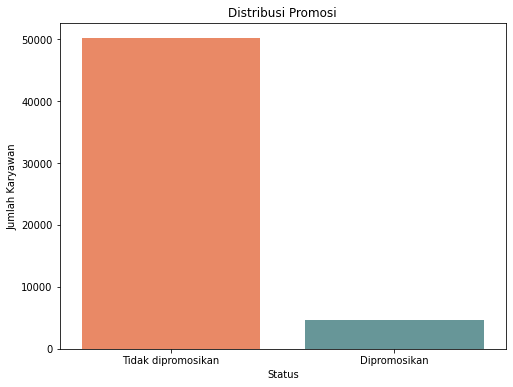

In [22]:
print("Percentage of customer churn:")
print(round(df['dipromosikan'].value_counts(normalize=True) * 100,2))

plt.figure(figsize = (8,6))
ax = sns.countplot('dipromosikan', data=df, palette=['coral', 'cadetblue'])
ax.set_xticklabels(['Tidak dipromosikan', 'Dipromosikan'])
ax.set_title('Distribusi Promosi')
ax.set_xlabel('Status')
ax.set_ylabel('Jumlah Karyawan')
plt.show()

Pada gambar di atas, terlihat bahwa lebih banyak data karyawan yang 'Tidak dipromosikan' daripada yang 'Dipromosikan'. Hal ini dapat menyebabkan masalah imbalance pada data.

## Employee Distribution

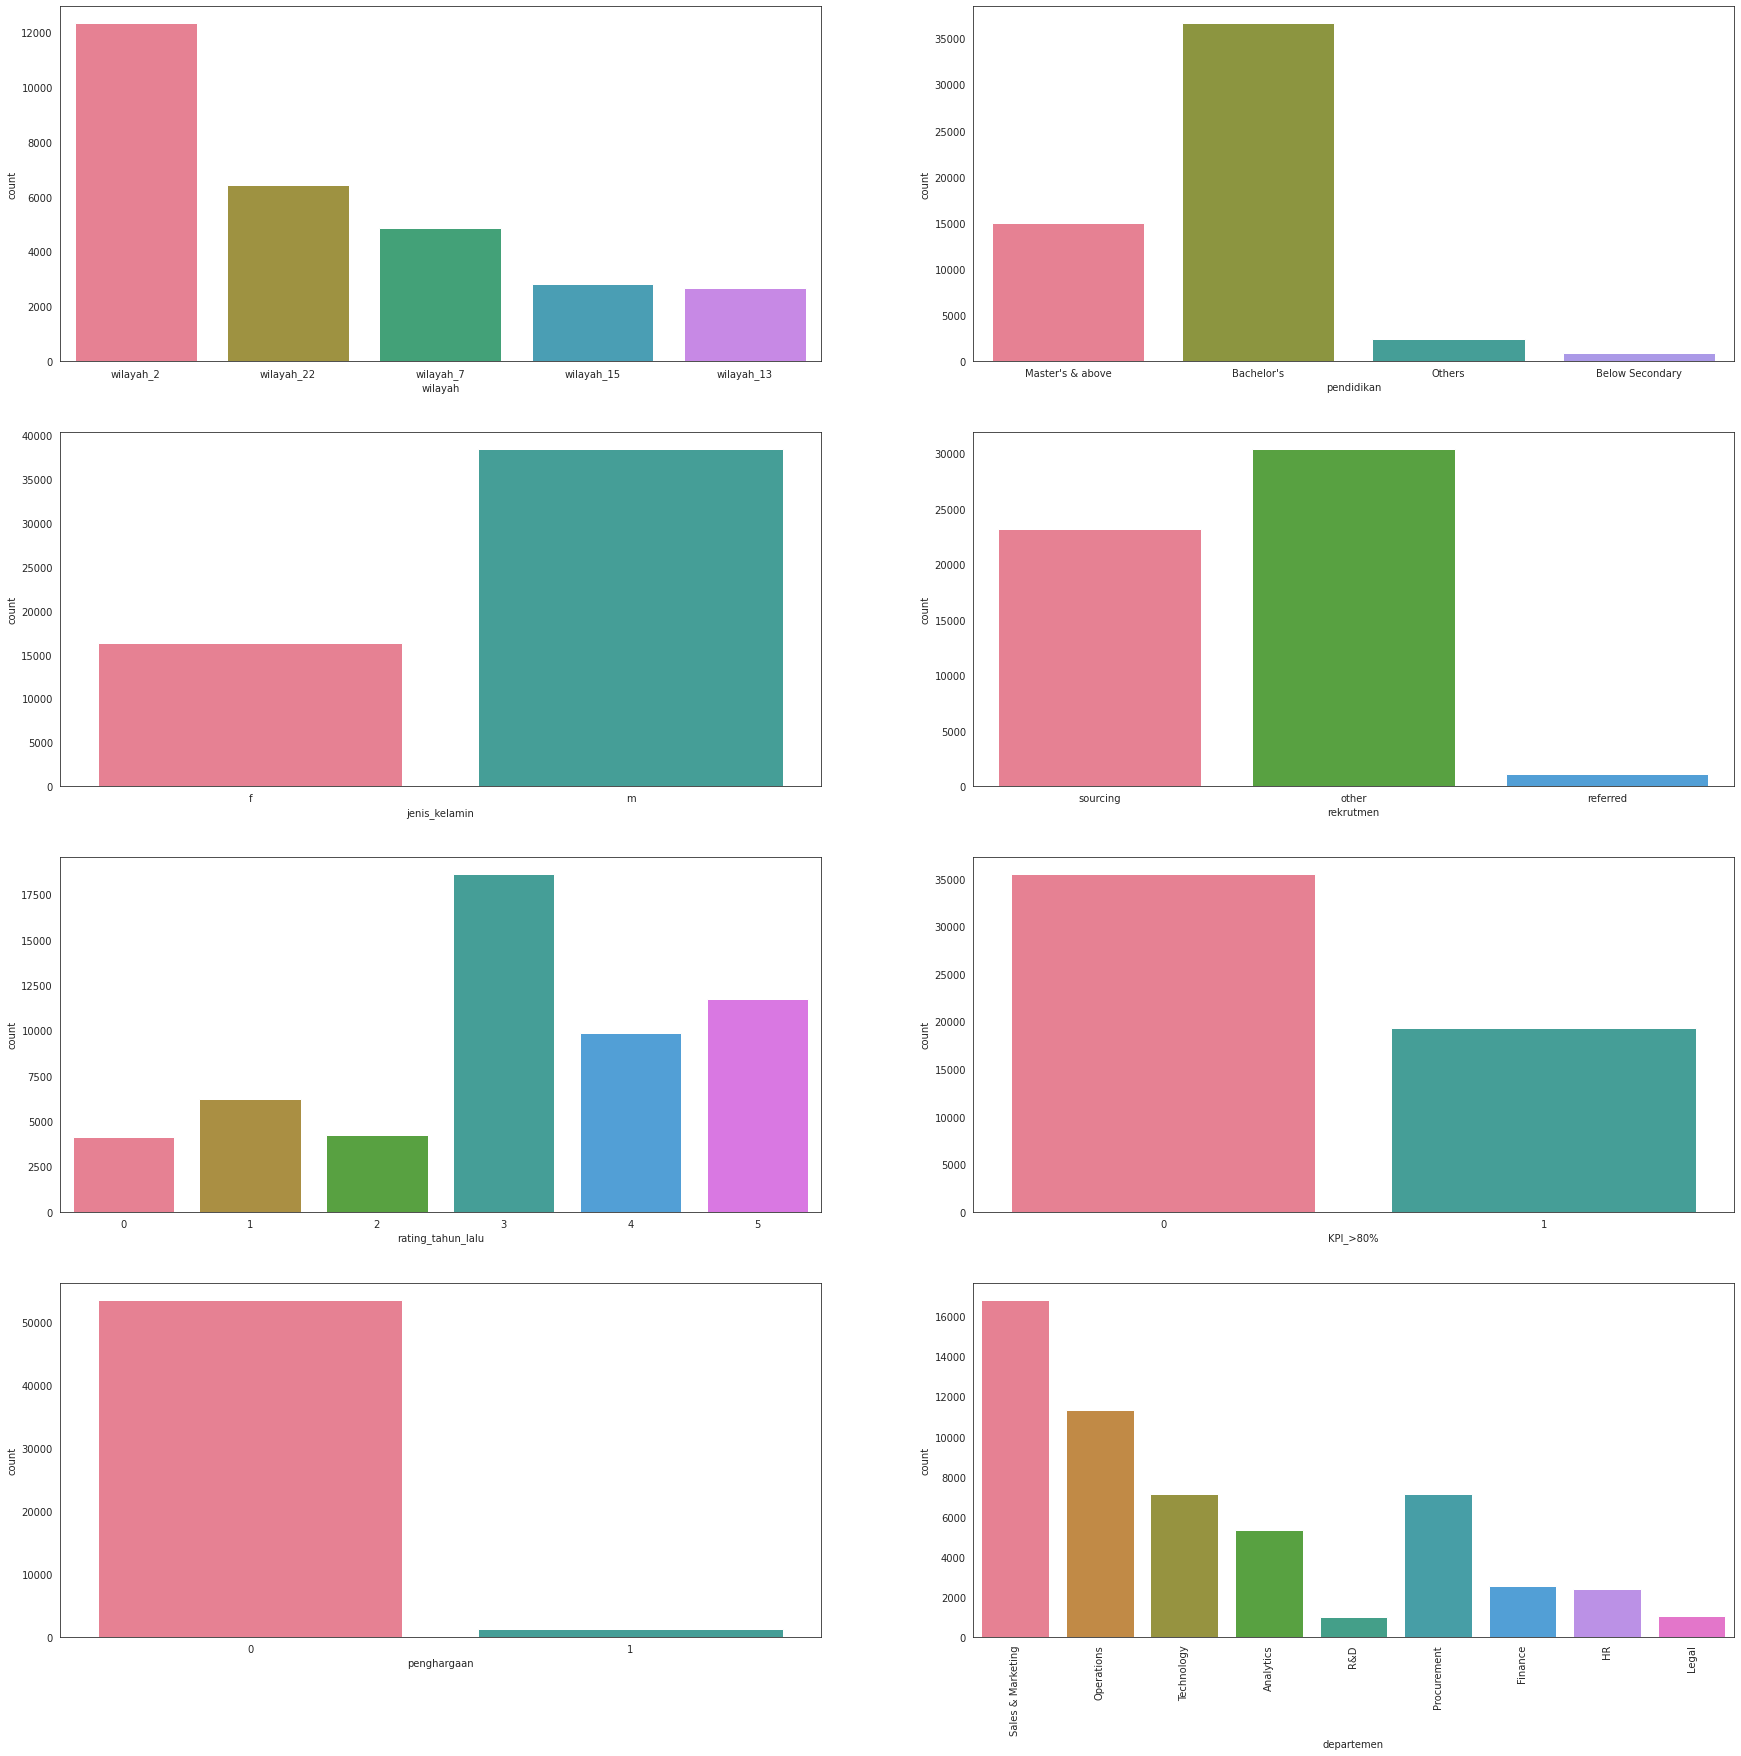

In [23]:
sns.set_style('white')
fig, axes = plt.subplots(nrows = 4,ncols = 2,figsize = (30,30))
sns.countplot(x = "wilayah", data = df, order= df['wilayah'].value_counts().iloc[:5].index, ax=axes[0][0], palette='husl')
sns.countplot(x = "pendidikan", data = df, ax=axes[0][1], palette='husl')
sns.countplot(x = "jenis_kelamin", data = df, ax=axes[1][0], palette='husl')
sns.countplot(x = "rekrutmen", data = df, ax=axes[1][1], palette='husl')
sns.countplot(x = "rating_tahun_lalu", data = df, ax=axes[2][0], palette='husl')
sns.countplot(x = "KPI_>80%", data = df, ax=axes[2][1], palette='husl')
sns.countplot(x = "penghargaan", data = df, ax=axes[3][0], palette='husl')
ax = sns.countplot(x = "departemen", data = df, ax=axes[3][1], palette='husl')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

Dari visualisasi di atas, dapat disimpulkan:
* Wilayah 2 memiliki karyawan paling banyak.
* Karyawan paling banyak menyandang gelar pendidikan Bachelors
* Karyawan paling banyak berjenis kelamin pria
* Karyawan paling banyak direkrut melalui 'other'
* Kebanyakan karyawan mendapatkan rating 3 pada tahun lalu
* Sebagian besar karyawan tidak dapat mencapai KPI >80%
* Sebagian karyawan tidak pernah mendapatkan penghargaan
* Departemen Sales & Marketing memiliki karyawan paling banyak

## Distribution of employees who get promotion on various variables

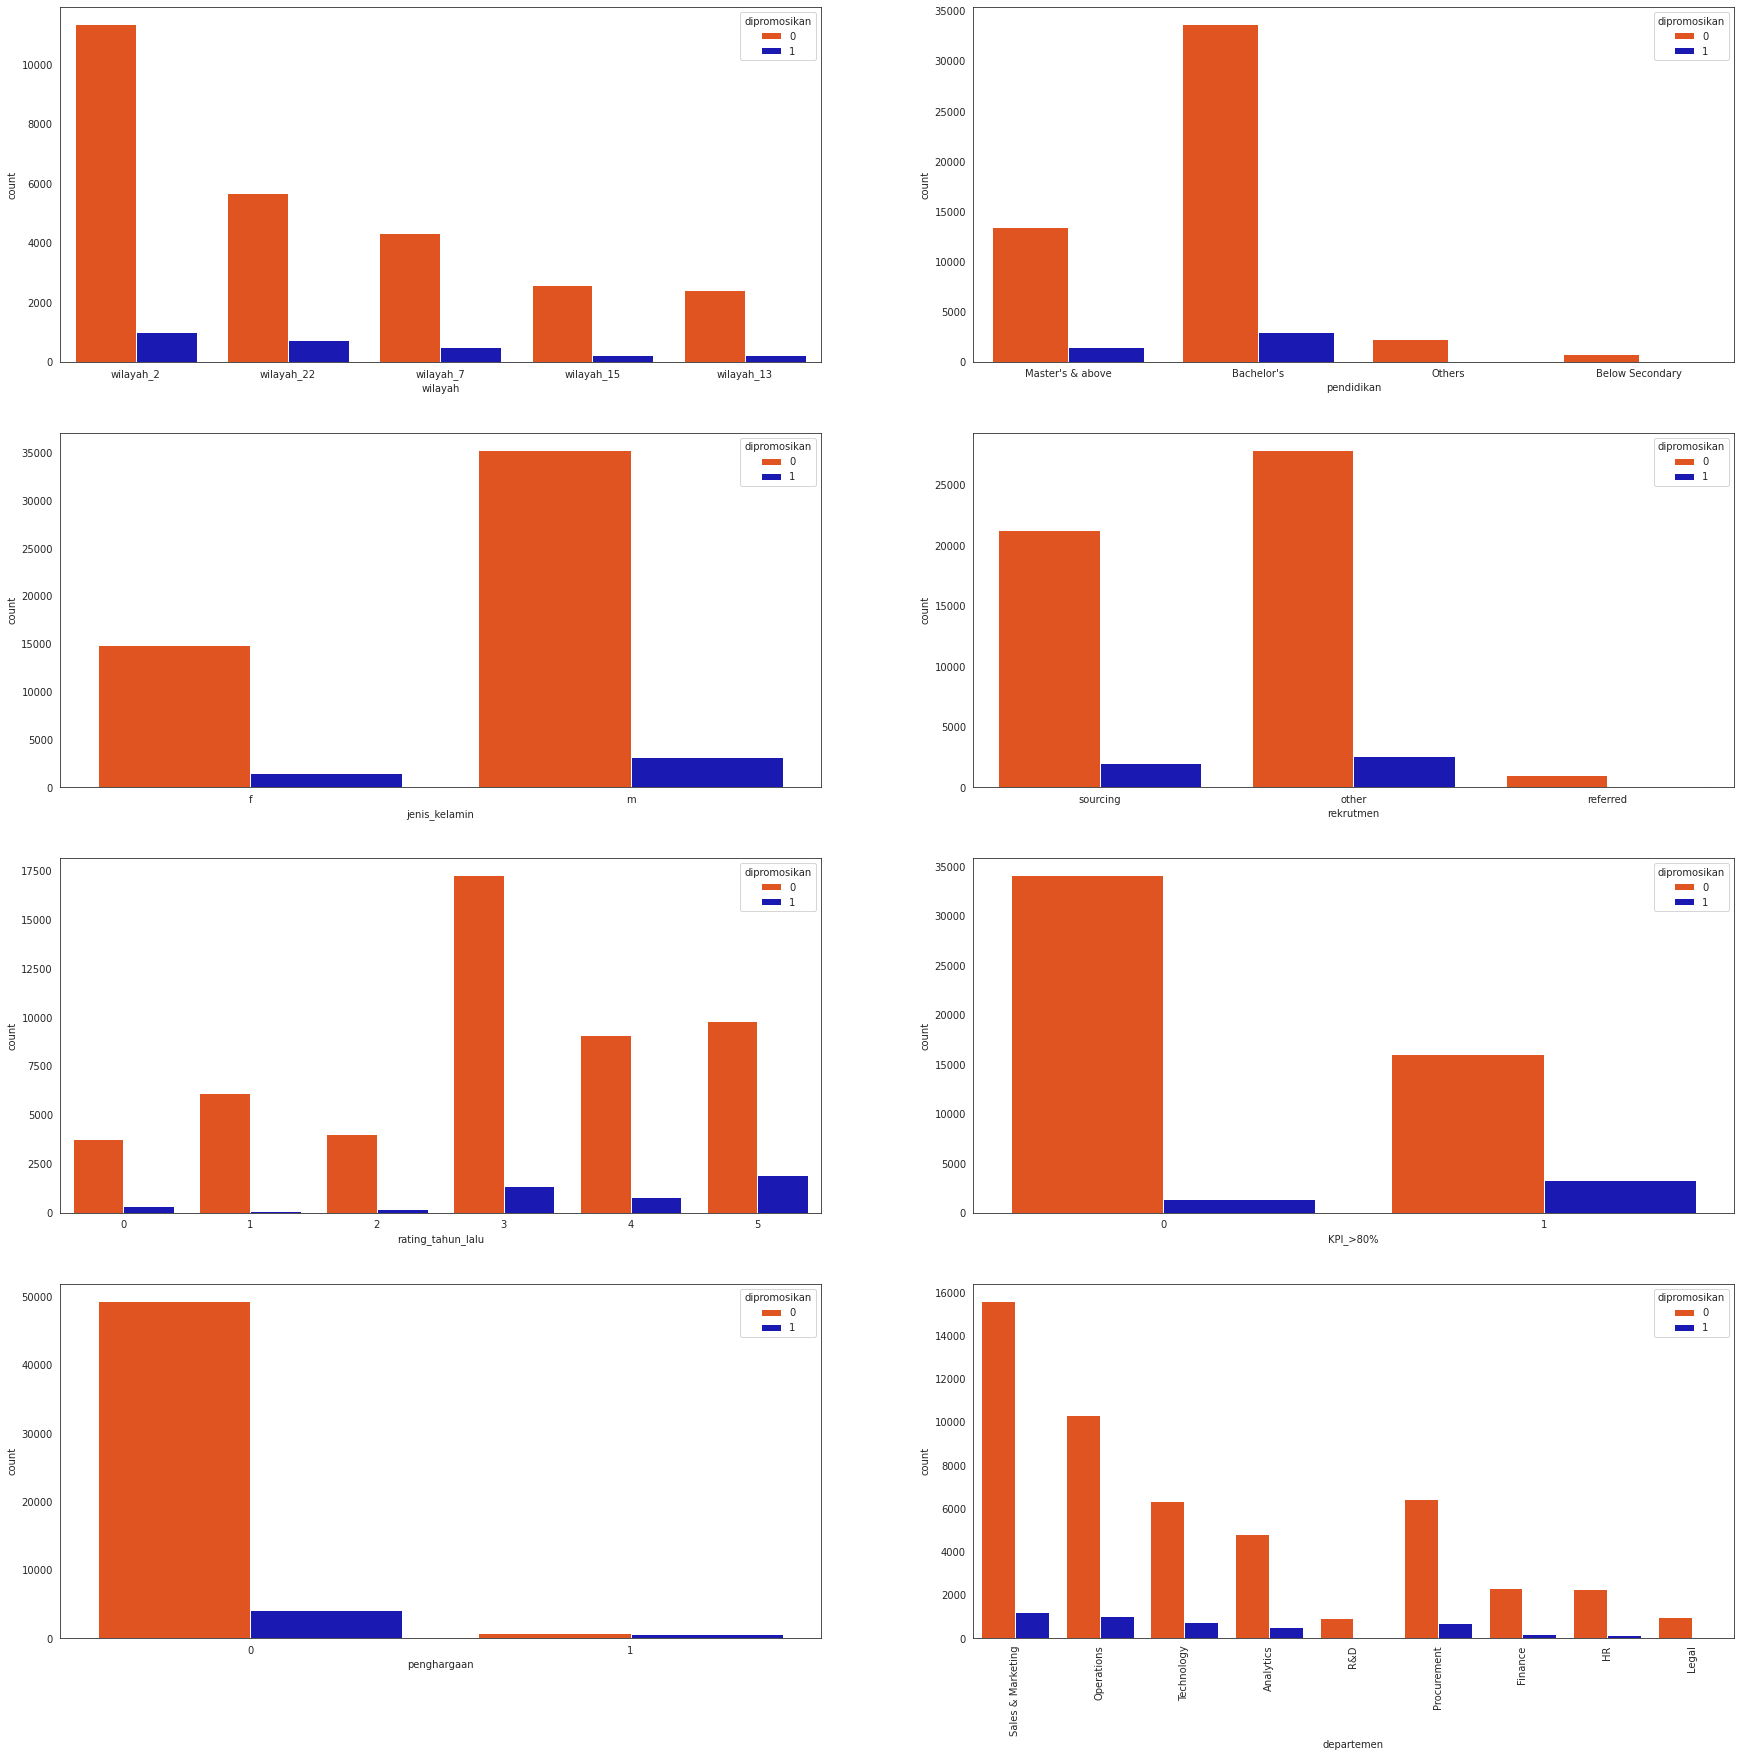

In [24]:
sns.set_style('white')
fig, axes = plt.subplots(nrows = 4,ncols = 2,figsize = (30,30))
sns.countplot(x = "wilayah", data = df, order = df['wilayah'].value_counts().iloc[:5].index, hue='dipromosikan', ax=axes[0][0], palette=['orangered','mediumblue'])
sns.countplot(x = "pendidikan", data = df, ax=axes[0][1], hue='dipromosikan', palette=['orangered','mediumblue'])
sns.countplot(x = "jenis_kelamin", data = df, ax=axes[1][0], hue='dipromosikan', palette=['orangered','mediumblue'])
sns.countplot(x = "rekrutmen", data = df, ax=axes[1][1], hue='dipromosikan', palette=['orangered','mediumblue'])
sns.countplot(x = "rating_tahun_lalu", data = df, ax=axes[2][0], hue='dipromosikan', palette=['orangered','mediumblue'])
sns.countplot(x = "KPI_>80%", data = df, ax=axes[2][1], hue='dipromosikan', palette=['orangered','mediumblue'])
sns.countplot(x = "penghargaan", data = df, ax=axes[3][0], hue='dipromosikan', palette=['orangered','mediumblue'])
ax = sns.countplot(x = "departemen", data = df, ax=axes[3][1], hue='dipromosikan', palette=['orangered','mediumblue'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

### Pendidikan

In [25]:
pendidikan = df['pendidikan'].unique()

for i in pendidikan:
  count = df[(df['pendidikan']==i) & (df['dipromosikan']==1)]['pendidikan'].count()
  count_total = df[df['pendidikan']==i]['pendidikan'].count()
  persen_promosi = count/count_total*100
  persen_promosi = round(persen_promosi, 2)
  print('Kemungkinan promosi untuk pendidikan {} adalah {}%'.format(i, persen_promosi))

Kemungkinan promosi untuk pendidikan Master's & above adalah 9.86%
Kemungkinan promosi untuk pendidikan Bachelor's adalah 8.2%
Kemungkinan promosi untuk pendidikan Others adalah 5.06%
Kemungkinan promosi untuk pendidikan Below Secondary adalah 8.32%


Karyawan yang memiliki gelar Master's & above memiliki potensi mendapatkan promosi lebih besar dibandingkan gelar pendidikan yang lain.

### Jenis Kelamin

In [26]:
gender = df['jenis_kelamin'].unique()

for i in gender:
  count = df[(df['jenis_kelamin']==i) & (df['dipromosikan']==1)]['jenis_kelamin'].count()
  count_total = df[df['jenis_kelamin']==i]['jenis_kelamin'].count()
  persen_promosi = count/count_total*100
  persen_promosi = round(persen_promosi, 2)
  if i == 'f':
    print('Kemungkinan promosi untuk karyawan yang berjenis kelamin wanita adalah {}%'.format(persen_promosi))
  else:
    print('Kemungkinan promosi untuk karyawan yang berjenis kelamin pria adalah {}%'.format(persen_promosi))

Kemungkinan promosi untuk karyawan yang berjenis kelamin wanita adalah 8.99%
Kemungkinan promosi untuk karyawan yang berjenis kelamin pria adalah 8.32%


Karyawan yang berjenis kelamin wanita memiliki potensi mendapatkan promosi lebih besar dibandingkan pria

### Penghargaan

In [27]:
penghargaan = df['penghargaan'].unique()

for i in penghargaan:
  count = df[(df['penghargaan']==i) & (df['dipromosikan']==1)]['penghargaan'].count()
  count_total = df[df['penghargaan']==i]['penghargaan'].count()
  persen_promosi = count/count_total*100
  persen_promosi = round(persen_promosi, 2)
  if i == 1:
    print('Kemungkinan promosi untuk karyawan yang pernah mendapatkan penghargaan adalah {}%'.format(persen_promosi))
  else:
    print('Kemungkinan promosi untuk karyawan yang tidak pernah mendapatkan penghargaan adalah {}%'.format(persen_promosi))

Kemungkinan promosi untuk karyawan yang tidak pernah mendapatkan penghargaan adalah 7.67%
Kemungkinan promosi untuk karyawan yang pernah mendapatkan penghargaan adalah 44.02%


Meskipun karyawan yang pernah mendapatkan penghargaan jumlahnya sedikit, akan tetapi potensi mendapatkan promosi lebih besar jika karyawan mendapatkan penghargaan.

### KPI

In [28]:
kpi = df['KPI_>80%'].unique()

for i in kpi:
  count = df[(df['KPI_>80%']==i) & (df['dipromosikan']==1)]['KPI_>80%'].count()
  count_total = df[df['KPI_>80%']==i]['KPI_>80%'].count()
  persen_promosi = count/count_total*100
  persen_promosi = round(persen_promosi, 2)
  if i == 1:
    print('Kemungkinan promosi untuk karyawan yang dapat mencapai KPI >80% adalah {}%'.format(persen_promosi))
  else:
    print('Kemungkinan promosi untuk karyawan yang tidak dapat mencapai KPI >80% adalah {}%'.format(persen_promosi))

Kemungkinan promosi untuk karyawan yang dapat mencapai KPI >80% adalah 16.91%
Kemungkinan promosi untuk karyawan yang tidak dapat mencapai KPI >80% adalah 3.96%


Karyawan yang berhasil mencapai KPI >80% berpotensi mendapatkan promosi lebih besar dibandingkan karyawan yang tidak dapat mencapai KPI >80%.

### Rating Tahun Lalu

In [29]:
rating = list(df['rating_tahun_lalu'].unique())
rating = sorted(rating)

for i in rating:
  count = df[(df['rating_tahun_lalu']==i) & (df['dipromosikan']==1)]['rating_tahun_lalu'].count()
  count_total = df[df['rating_tahun_lalu']==i]['rating_tahun_lalu'].count()
  persen_promosi = count/count_total*100
  persen_promosi = round(persen_promosi, 2)
  print('Kemungkinan promosi untuk rating tahun lalu {} adalah {}%'.format(i, persen_promosi))

Kemungkinan promosi untuk rating tahun lalu 0 adalah 8.22%
Kemungkinan promosi untuk rating tahun lalu 1 adalah 1.41%
Kemungkinan promosi untuk rating tahun lalu 2 adalah 4.28%
Kemungkinan promosi untuk rating tahun lalu 3 adalah 7.28%
Kemungkinan promosi untuk rating tahun lalu 4 adalah 7.94%
Kemungkinan promosi untuk rating tahun lalu 5 adalah 16.36%


Kemungkinan mendapatkan promosi akan meningkat seiring dengan peningkatan rating yang didapatkan. Akan tetapi, rating 0 memiliki potensi lebih besar dibandingkan rating 0, 1, 2, 3, dan 4. Rating 0 ini dapat menandakan bahwa karyawan belum melakukan evaluasi rating karena masa kerjanya baru 1 tahun.

## Jumlah Training

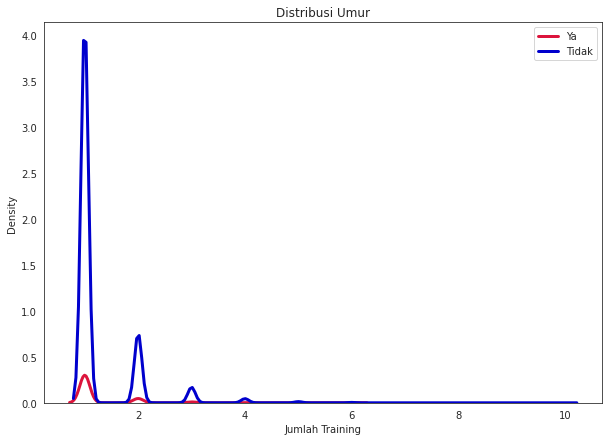

In [30]:
#Jumlah training kdeplot
plt.figure(figsize = (10,7))
ax = sns.kdeplot('jumlah_training', data=df, hue='dipromosikan', palette=['mediumblue','crimson'], linewidth=3)
ax.set_title('Distribusi Umur')
ax.set_xlabel('Jumlah Training')
ax.legend(['Ya', 'Tidak'])
plt.show()

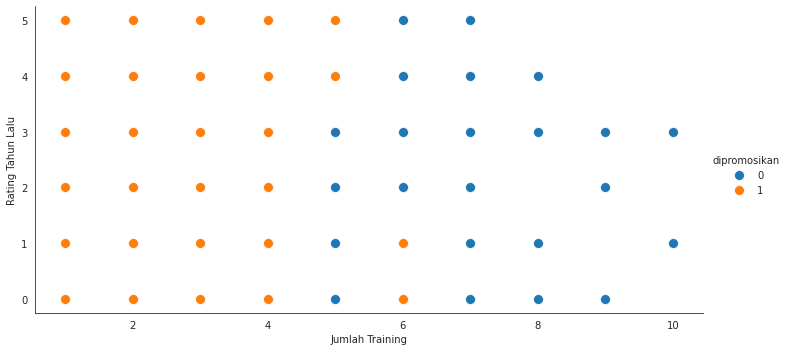

In [31]:
sns.set_style('white')
ax = sns.FacetGrid(df, hue = "dipromosikan", size = 5, aspect=2).map(sns.scatterplot, "jumlah_training", "rating_tahun_lalu", s=100)
ax.add_legend()
ax.set_titles('Hubungan antara Rating Tahun Lalu, Jumlah Training, dan Status Promosi')
ax.set_xlabels('Jumlah Training')
ax.set_ylabels('Rating Tahun Lalu')
plt.show()

Semakin banyak jumlah training yang dilakukan, semakin kecil kemungkinan mendapatkan promosinya, tidak peduli jumlah rating yang didapatkannya.

## Rata-rata Skor Training

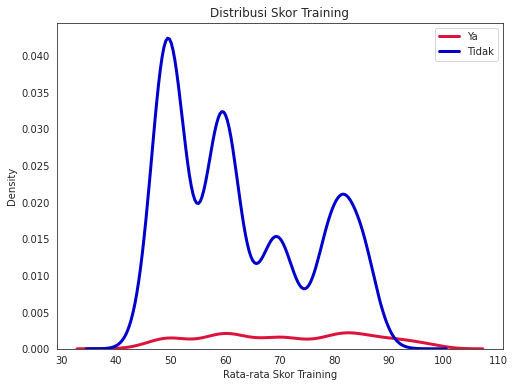

In [32]:
#Rata-rata skor training kdeplot
plt.figure(figsize = (8,6))
ax = sns.kdeplot('rata_rata_skor_training', data=df, hue='dipromosikan', palette=['mediumblue','crimson'], linewidth=3)
ax.set_title('Distribusi Skor Training')
ax.set_xlabel('Rata-rata Skor Training')
ax.legend(['Ya', 'Tidak'])
plt.show()

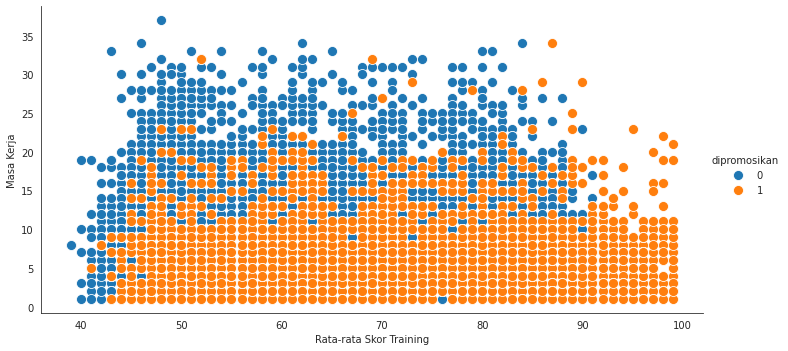

In [33]:
sns.set_style('white')
ax = sns.FacetGrid(df, hue = "dipromosikan", size = 5, aspect=2).map(sns.scatterplot, "rata_rata_skor_training", "masa_kerja", s=100)
ax.add_legend()
ax.set_titles('Hubungan antara Rating Tahun Lalu, Jumlah Training, dan Status Promosi')
ax.set_xlabels('Rata-rata Skor Training')
ax.set_ylabels('Masa Kerja')
plt.show()

Karyawan yang memiliki masa kerja kurang dari 15 tahun berpotensi mendapatkan promosi semakin besar. Semakin besar rata-rata skor training yang didapatkan karyawan semakin besar potensinya mendapatkan promosi.

## Umur

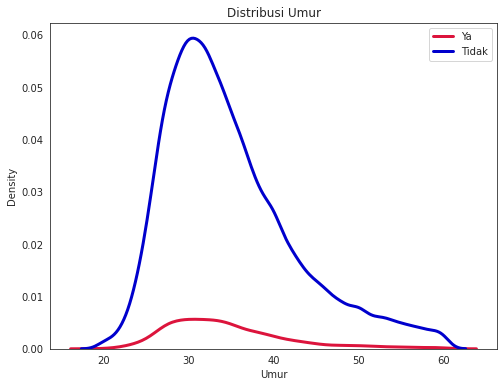

In [34]:
#Age kdeplot
plt.figure(figsize = (8,6))
ax = sns.kdeplot('umur', data=df, hue='dipromosikan', palette=['mediumblue','crimson'], linewidth=3)
ax.set_title('Distribusi Umur')
ax.set_xlabel('Umur')
ax.legend(['Ya', 'Tidak'])
plt.show()

In [35]:
#Binning age column
range = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60']
bins = [20, 26, 31, 36, 41, 46, 51, 56, 61] # [20, 26, 31, 36, 50] 
age_EDA = pd.DataFrame(pd.cut(x = df['umur'], bins = bins, labels = range, include_lowest = True))
df['umur_bin'] = age_EDA['umur']
df.head()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan,umur_bin
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0,31-35
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5,4,0,0,60,0,26-30
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0,31-35
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1,10,0,0,50,0,36-40
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3,2,0,0,73,0,41-45


In [36]:
age_group = df.groupby('umur_bin', as_index=False).agg(persen_promosi = ('dipromosikan', 'mean'))
age_group

,umur_bin,persen_promosi
0,20-25,0.071541
1,26-30,0.090300
2,31-35,0.092570
3,36-40,0.087006
4,41-45,0.074016
5,46-50,0.068560
6,51-55,0.066204
7,56-60,0.059293


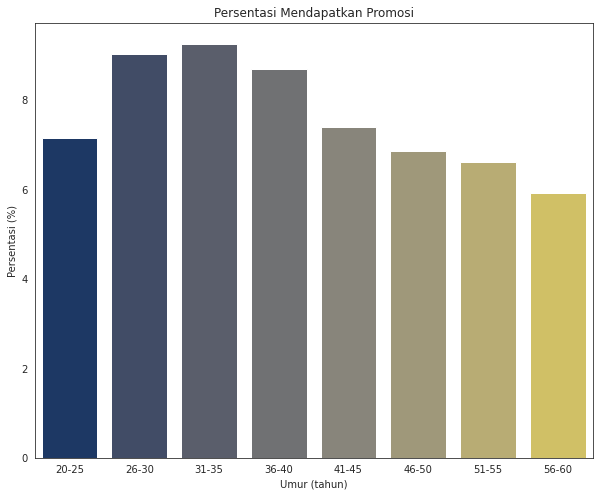

In [37]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='umur_bin', y=age_group['persen_promosi']*100, data=age_group, palette='cividis')
ax.set_title('Persentasi Mendapatkan Promosi')
ax.set_xlabel('Umur (tahun)')
ax.set_ylabel('Persentasi (%)')
plt.show()

Karyawan yang berumur 26-40 tahun berpotensi mendapatkan promosi yang lebih besar.

## Masa Kerja

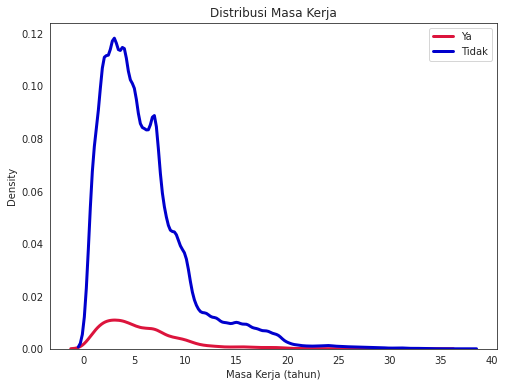

In [38]:
#Masa kerja kdeplot
plt.figure(figsize = (8,6))
ax = sns.kdeplot('masa_kerja', data=df, hue='dipromosikan', palette=['mediumblue','crimson'], linewidth=3)
ax.set_title('Distribusi Masa Kerja')
ax.set_xlabel('Masa Kerja (tahun)')
ax.legend(['Ya', 'Tidak'])
plt.show()

In [39]:
#Binning masa kerja column
range = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '>31']
bins = [0, 6, 11, 16, 21, 26, 30, 37] 
kerja_EDA = pd.DataFrame(pd.cut(x = df['masa_kerja'], bins = bins, labels = range, include_lowest = True))
df['masa_kerja_bin'] = kerja_EDA['masa_kerja']
df.head()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan,umur_bin,masa_kerja_bin
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0,31-35,6-10
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5,4,0,0,60,0,26-30,0-5
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0,31-35,6-10
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1,10,0,0,50,0,36-40,6-10
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3,2,0,0,73,0,41-45,0-5


In [40]:
kerja_group = df.groupby('masa_kerja_bin', as_index=False).agg(persen_promosi = ('dipromosikan', 'mean'))
kerja_group

,masa_kerja_bin,persen_promosi
0,0-5,0.085656
1,6-10,0.089049
2,11-15,0.072532
3,16-20,0.071376
4,21-25,0.052083
5,26-30,0.055556
6,>31,0.068182


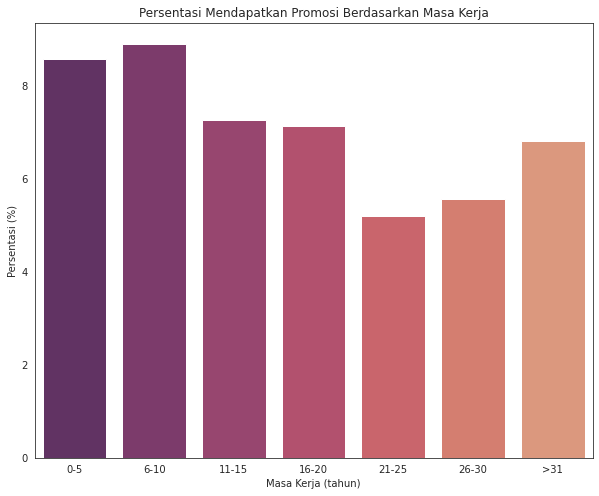

In [41]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='masa_kerja_bin', y=kerja_group['persen_promosi']*100, data=kerja_group, palette='flare_r')
ax.set_title('Persentasi Mendapatkan Promosi Berdasarkan Masa Kerja')
ax.set_xlabel('Masa Kerja (tahun)')
ax.set_ylabel('Persentasi (%)')
plt.show()

Karyawan yang memiliki masa kerja 0-10 tahun berpotensi mendapatkan promosi lebih besar.

# Feature Engineering

* Categorical features:'departemen', 'wilayah', 'pendidikan', 'jenis_kelamin', 'rekrutmen', 'rating_tahun_lalu', 'KPI_>80%', 'penghargaan', 'dipromosikan'
* Ordinal features : 'pendidikan', 'rating_tahun_lalu'

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id_karyawan              54808 non-null  int64   
 1   departemen               54808 non-null  object  
 2   wilayah                  54808 non-null  object  
 3   pendidikan               54808 non-null  object  
 4   jenis_kelamin            54808 non-null  object  
 5   rekrutmen                54808 non-null  object  
 6   jumlah_training          54808 non-null  int64   
 7   umur                     54808 non-null  int64   
 8   rating_tahun_lalu        54808 non-null  int64   
 9   masa_kerja               54808 non-null  int64   
 10  KPI_>80%                 54808 non-null  int64   
 11  penghargaan              54808 non-null  int64   
 12  rata_rata_skor_training  54808 non-null  int64   
 13  dipromosikan             54808 non-null  int64   
 14  umur_b

## Add New Feature

Pada data akan ditambah feature/kolom baru, yaitu:
* rata_rata_skor_training_departemen: nilai rata-rata skor training karyawan pada suatu departemen.
* perbandingan_skor_dengan_rata_rata_departemen: nilai rata-rata skor training tiap karyawan dibagi dengan nilai rata-rata departemen. Jika nilai >1, artinya nilai yang didapatkan karyawan lebih besar dibandingkan rata-rata nilai rekan kerjanya dalam satu departemen.
* akumulai_skor: jumlah total skor training yang didapatkan karyawan selama bekerja di perusahaan ini. 

In [43]:
df_model = df.copy()
df_model['rata_rata_skor_training_departemen'] = df_model['departemen'].map(df_model.groupby('departemen')['rata_rata_skor_training'].mean())
df_model['perbandingan_skor_dengan_rata_rata_departemen'] = df_model['rata_rata_skor_training'] / df_model['rata_rata_skor_training_departemen']

In [44]:
df_model['akumulasi_skor'] = df_model['jumlah_training']*df_model['rata_rata_skor_training']

## Encode Categorical Variable

In [45]:
#Print unique value for each categorical column
cat_column = ['wilayah', 'pendidikan', 'departemen', 'rekrutmen']
for i in cat_column:
  print('{}: {}'.format(i, df[i].unique()))

wilayah: ['wilayah_7' 'wilayah_22' 'wilayah_19' 'wilayah_23' 'wilayah_26'
 'wilayah_2' 'wilayah_20' 'wilayah_34' 'wilayah_1' 'wilayah_4'
 'wilayah_29' 'wilayah_31' 'wilayah_15' 'wilayah_14' 'wilayah_11'
 'wilayah_5' 'wilayah_28' 'wilayah_17' 'wilayah_13' 'wilayah_16'
 'wilayah_25' 'wilayah_10' 'wilayah_27' 'wilayah_30' 'wilayah_12'
 'wilayah_21' 'wilayah_8' 'wilayah_32' 'wilayah_6' 'wilayah_33'
 'wilayah_24' 'wilayah_3' 'wilayah_9' 'wilayah_18']
pendidikan: ["Master's & above" "Bachelor's" 'Others' 'Below Secondary']
departemen: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
rekrutmen: ['sourcing' 'other' 'referred']


<p>Untuk kolom 'departemen' dan 'rekrutmen' akan dilakukan OneHot Encoding karena jumlah pilihan/kategori tidak banyak. Pengaplikasian OneHot Encoding mencegah model menilai kategori dalam bentuk ranking. Setelah dilakukan OneHot Encoding, salah satu label didrop untuk mencegah terjadinya Dummy Variable Trap, yaitu kondisi dimana variabel sangat berkorelasi satu sama lainnya (multicollinearity).</p>
<p>Untuk kolom 'jenis_kelamin' akan dilakukan Label Encoding karena merupakan binary class. Untuk kolom 'wilayah' dilakukan Label Encoding karena jumlah pilihan/kategorinya yang sangat banyak.</p>
<p>Untuk kolom 'pendidikan' akan dilakukan encoding secara manual, karena nilainya bersifat ordinal dan jika di-encode menggunakan Label Encoding tidak menghasilkan urutan yang diinginkan.</p>

In [46]:
#OneHot Encoder for 'departemen' and 'rekrutment' columns
df_model = pd.get_dummies(data=df_model, columns=['departemen','rekrutmen'])

#Drop 'umur_bin' and 'masa_kerja_bin' from EDA
#Drop 'departemen_Analystics' and 'rekrutment_referred' to prevent multicollinearity
df_model = df_model.drop(['umur_bin','masa_kerja_bin', 'departemen_Analytics','rekrutmen_referred'],axis=1)

#Label Encoder for 'jenis_kelamin' and 'wilayah' columns
le = LabelEncoder()
df_model['jenis_kelamin'] = le.fit_transform(df_model['jenis_kelamin'])
df_model['wilayah'] = le.fit_transform(df_model['wilayah'])

#Manually encode for 'pendidikan' column
df_model['pendidikan'] = df_model['pendidikan'].replace(["Master's & above", "Bachelor's", "Others", "Below Secondary"], [3,2,1,0])

df_model.head()

,id_karyawan,wilayah,pendidikan,jenis_kelamin,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan,rata_rata_skor_training_departemen,perbandingan_skor_dengan_rata_rata_departemen,akumulasi_skor,departemen_Finance,departemen_HR,departemen_Legal,departemen_Operations,departemen_Procurement,departemen_R&D,departemen_Sales & Marketing,departemen_Technology,rekrutmen_other,rekrutmen_sourcing
0,80589,31,3,0,1,35,5,8,1,0,49,0,50.261698,0.974897,49,0,0,0,0,0,0,1,0,0,1
1,80292,14,2,1,1,30,5,4,0,0,60,0,60.226648,0.996237,60,0,0,0,1,0,0,0,0,1,0
2,22664,10,2,1,1,34,3,7,0,0,50,0,50.261698,0.994793,50,0,0,0,0,0,0,1,0,0,1
3,17693,15,2,1,2,39,1,10,0,0,50,0,50.261698,0.994793,100,0,0,0,0,0,0,1,0,1,0
4,64096,18,2,1,1,45,3,2,0,0,73,0,79.928692,0.913314,73,0,0,0,0,0,0,0,1,1,0


In [47]:
#Convert uit8 data type to integer
def convert_to_int(dataframe_series):
    if dataframe_series.dtype=='uint8':
        dataframe_series = dataframe_series.astype('int')
    return dataframe_series
df_model = df_model.apply(lambda x: convert_to_int(x))
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id_karyawan                                    54808 non-null  int64  
 1   wilayah                                        54808 non-null  int64  
 2   pendidikan                                     54808 non-null  int64  
 3   jenis_kelamin                                  54808 non-null  int64  
 4   jumlah_training                                54808 non-null  int64  
 5   umur                                           54808 non-null  int64  
 6   rating_tahun_lalu                              54808 non-null  int64  
 7   masa_kerja                                     54808 non-null  int64  
 8   KPI_>80%                                       54808 non-null  int64  
 9   penghargaan                                    548

# Correlation

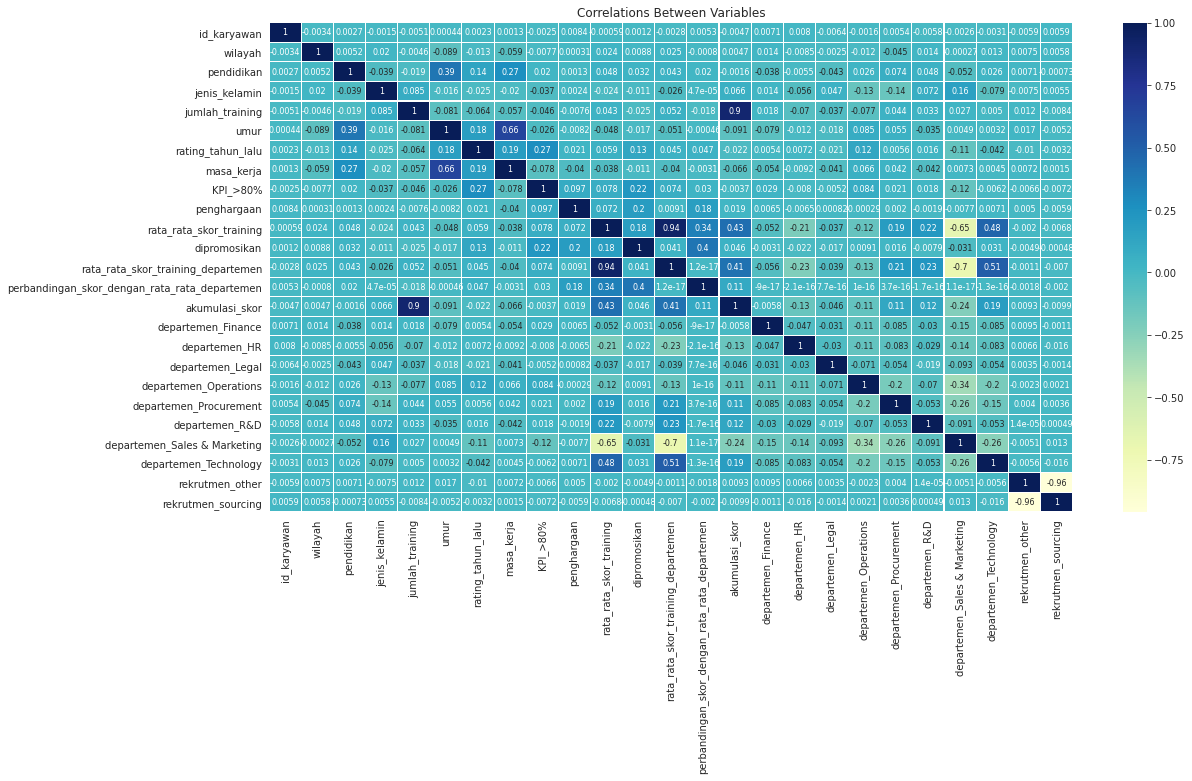

In [48]:
#Correlations between variables
fig, ax = plt.subplots(figsize=(18,9))  
sns.heatmap(data=df_model.corr(), annot=True, annot_kws={"fontsize":8}, cmap = plt.cm.YlGnBu, linewidths=.1, ax=ax).set_title('Correlations Between Variables');

Dari grafik di atas, terlihat bahwa kolom 'dipromosikan' memiliki korelasi paling tinggi dengan 'KPI_>80%' dan 'perbandingan_skor_dengan_rata_rata_dapartemen' yaitu sebesar 0,39 dan 0,37.


# Handling Imbalance

Masalah imbalance pada target variable akan dihandling dengan melakukan undersampling. Yaitu dengan melakukan resample data yang lebih banyak (mayoritas) hingga jumlahnya mencapai data yang lebih sedikit.

In [49]:
#Value counts for 'dipromosikan' column
df_model['dipromosikan'].value_counts()

0    50140
1     4668
Name: dipromosikan, dtype: int64

In [50]:
#Value counts for 'dipromosikan' column (normalize)
df_model['dipromosikan'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: dipromosikan, dtype: float64

Data karyawan yang tidak dipromosikan (0) awalnya bernilai 50140. Kita akan lakukan undersampling, yaitu dengan mengambil 4668 data karyawan yang tidak dipromosikan secara acak. Sehingga jumlah data karyawan yang dipromosikan dan tidak dipromosikan bernilai sama.

In [51]:
from sklearn.utils import resample

promosi = df_model[df_model['dipromosikan']==1]
no_promosi = df_model[df_model['dipromosikan']==0]

balance_data = resample(no_promosi,
                        replace=True,
                        n_samples = len(promosi),
                        random_state=12)
df_model = pd.concat([promosi, balance_data])
df_model['dipromosikan'].value_counts(normalize=True)

1    0.5
0    0.5
Name: dipromosikan, dtype: float64

# Modeling

In [52]:
#Define features and target
X = df_model.drop(['id_karyawan','dipromosikan'], axis=1)
y = df_model['dipromosikan']

In [53]:
#Split data into train and test data (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5601, 23), (3735, 23), (5601,), (3735,))

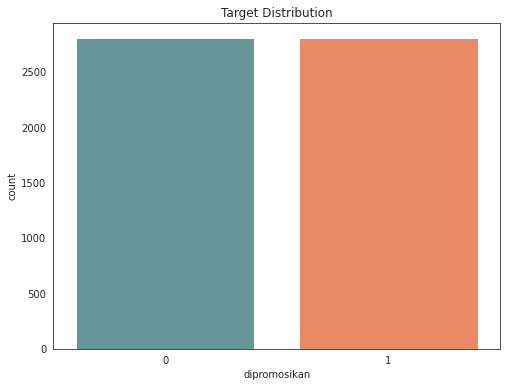

In [54]:
#Check target distribution for train data
plt.figure(figsize = (8,6))
ax = sns.countplot(y_train, palette=['cadetblue','coral'])
ax.set_title('Target Distribution')
plt.show()

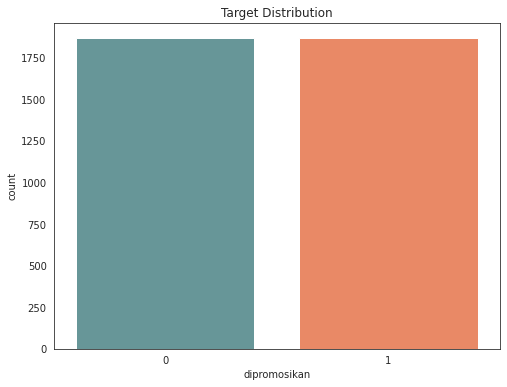

In [55]:
#Check target distribution for test data
plt.figure(figsize = (8,6))
ax = sns.countplot(y_test, palette=['cadetblue','coral'])
ax.set_title('Target Distribution')
plt.show()

## Base Model

In [56]:
#Test AUC values for various models
model = {'KNN' : KNeighborsClassifier(),
         'Gaussian NB' : GaussianNB(),
         'Logistic Regression' : LogisticRegression(),
         'Random Forest' : RandomForestClassifier(),
         'Decision Tree' : DecisionTreeClassifier(),
         'XGBoost' : XGBClassifier(),
         'LightGBM' : LGBMClassifier()}
result={}
for key,value in model.items():
  model = value
  model.fit(X_train, y_train)
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  auc = roc_auc_score(y_test, y_pred_proba)
  result[key]=auc
  print('{}: {}'.format(key, auc))

KNN: 0.7443635313669515
Gaussian NB: 0.8366853464145092
Logistic Regression: 0.875999410475416
Random Forest: 0.9030170411600559
Decision Tree: 0.7758980787692011
XGBoost: 0.9078614078168208
LightGBM: 0.9062624370762793


In [57]:
base_model = pd.DataFrame(result.items(), columns=['Model', 'AUC'])
base_model = base_model.sort_values('AUC', ascending=False).reset_index(drop=True)
base_model

,Model,AUC
0,XGBoost,0.907861
1,LightGBM,0.906262
2,Random Forest,0.903017
3,Logistic Regression,0.875999
4,Gaussian NB,0.836685
5,Decision Tree,0.775898
6,KNN,0.744364


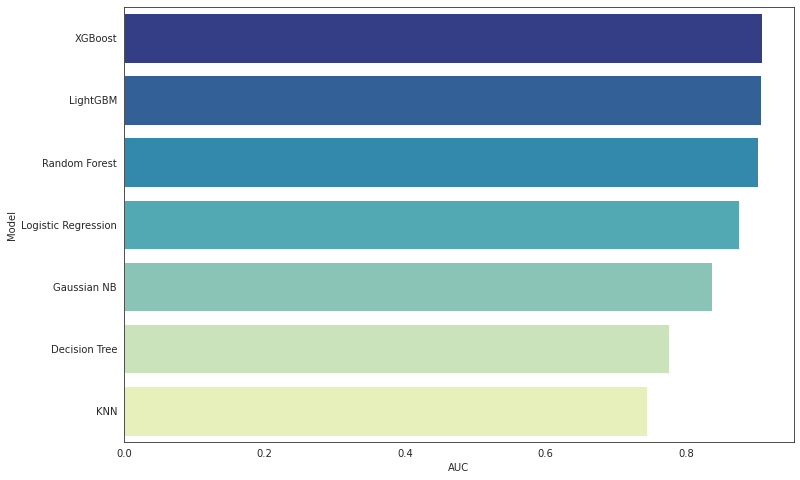

In [58]:
sns.set_style('white')
plt.figure(figsize=(12,8))
ax=sns.barplot(y='Model', x='AUC', data=base_model, palette='YlGnBu_r')
plt.show()

Dari base model di atas, didapatkan 3 model terbaik, yaitu:
* XGBoost
* LightGBM
* Random Forest

<p>Selanjutnya akan dilakukan pengecekan lebih lanjut terkait evaluation metrics dan apakah overfitting atau tidak.</p>

## XGBoost

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1868
           1       0.76      0.94      0.84      1867

    accuracy                           0.82      3735
   macro avg       0.84      0.82      0.82      3735
weighted avg       0.84      0.82      0.82      3735



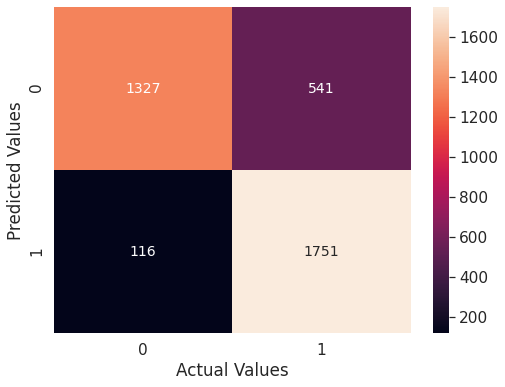

In [59]:
#Build model XGBoost and check confusion matrix
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
y_pred = xgbmodel.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

In [60]:
#Check accuracy train and test
print('Accuracy train: %.3f'%accuracy_score(y_train, xgbmodel.predict(X_train)))
print('Accuracy test: %.3f'%accuracy_score(y_test, y_pred))

Accuracy train: 0.829
Accuracy test: 0.824


In [61]:
#Function to generate AUC ROC for test data
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,label="AUC = %.3f" %auc)
    plt.title('Receiver Operating Characteristic (ROC) Curve Test')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4)
    plt.show()
    pass

In [62]:
#Function to generate AUC ROC for train data
def generate_auc_roc_curve_train(clf, X_train):
    y_pred_proba = clf.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train,  y_pred_proba)
    auc = roc_auc_score(y_train, y_pred_proba)
    plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,label="AUC = %.3f" %auc)
    plt.title('Receiver Operating Characteristic (ROC) Curve Train')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4)
    plt.show()
    pass

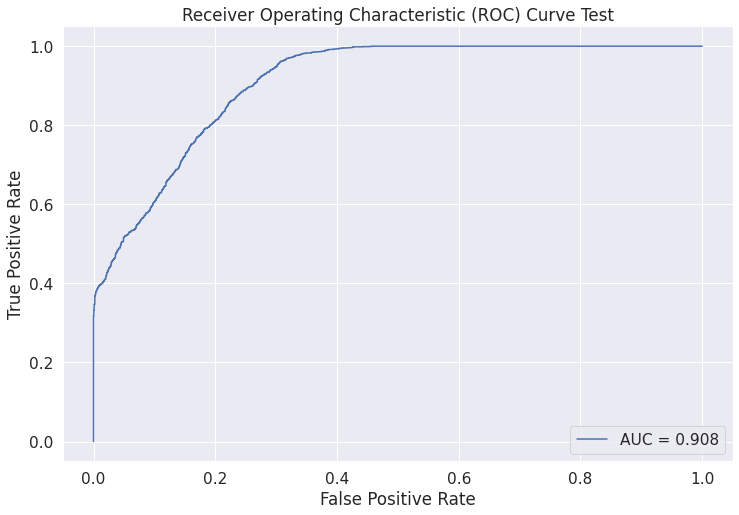

In [63]:
#Check ROC curve and AUC test data
generate_auc_roc_curve(xgbmodel, X_test)

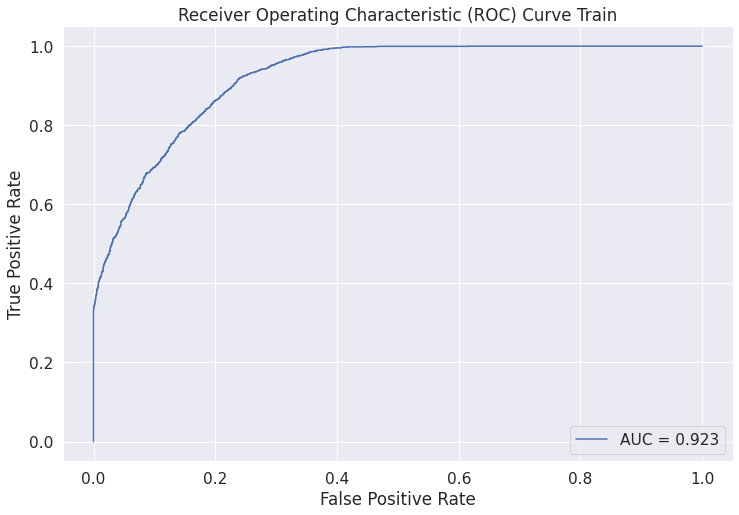

In [64]:
#Check ROC curve and AUC train data
generate_auc_roc_curve_train(xgbmodel, X_train)

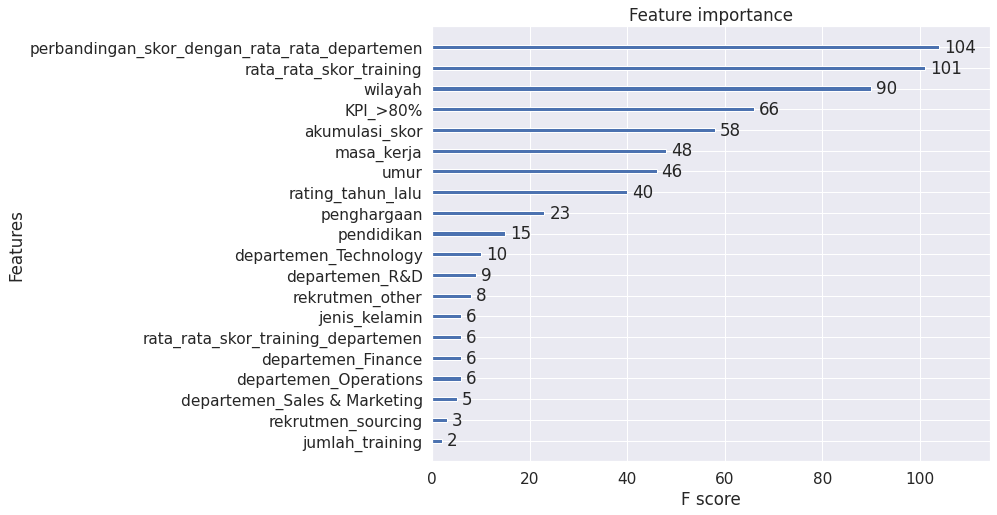

In [65]:
#Check Feature Importance
import xgboost as xgb
# plot feature importance
fig,ax= plt.subplots(figsize=(10,8))
xgb.plot_importance(xgbmodel, ax=ax)
plt.show()

## LightGBM

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1868
           1       0.77      0.89      0.83      1867

    accuracy                           0.81      3735
   macro avg       0.82      0.81      0.81      3735
weighted avg       0.82      0.81      0.81      3735



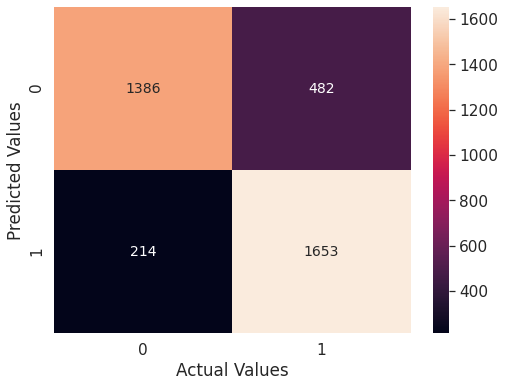

In [66]:
#Build model LightGBM and check confusion matrix
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

In [67]:
#Check accuracy train and test
print('Accuracy train: %.3f'%accuracy_score(y_train, lgbm.predict(X_train)))
print('Accuracy test: %.3f'%accuracy_score(y_test, y_pred))

Accuracy train: 0.912
Accuracy test: 0.814


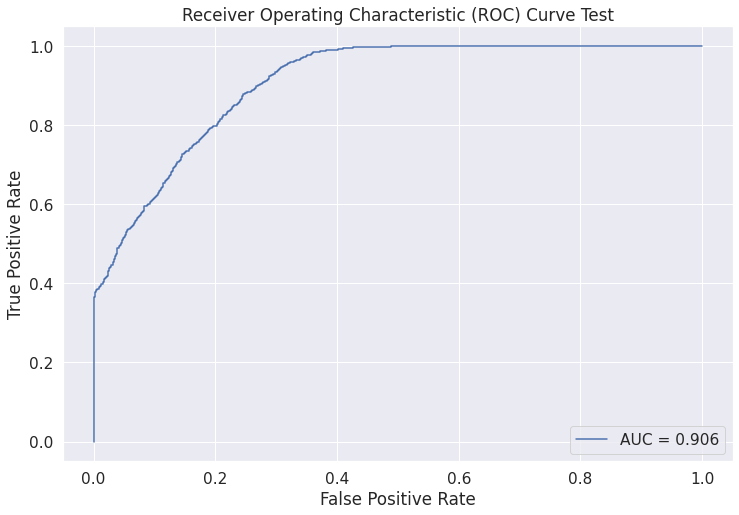

In [68]:
#Check ROC curve and AUC test data
generate_auc_roc_curve(lgbm, X_test)

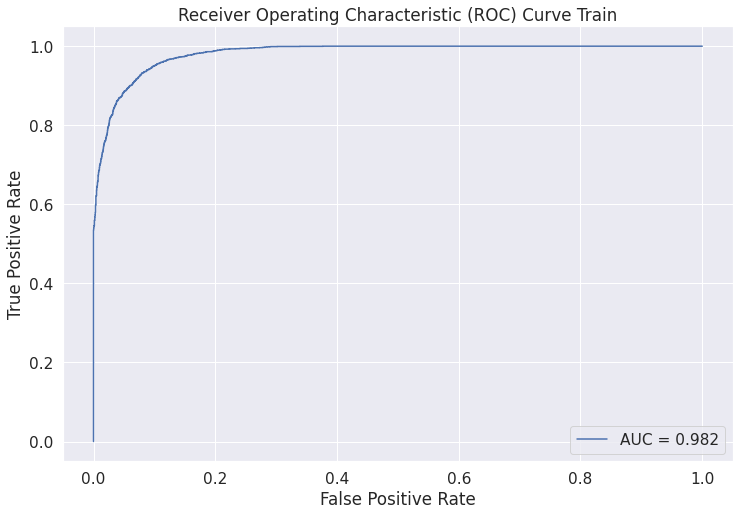

In [69]:
#Check ROC curve and AUC train data
generate_auc_roc_curve_train(lgbm, X_train)

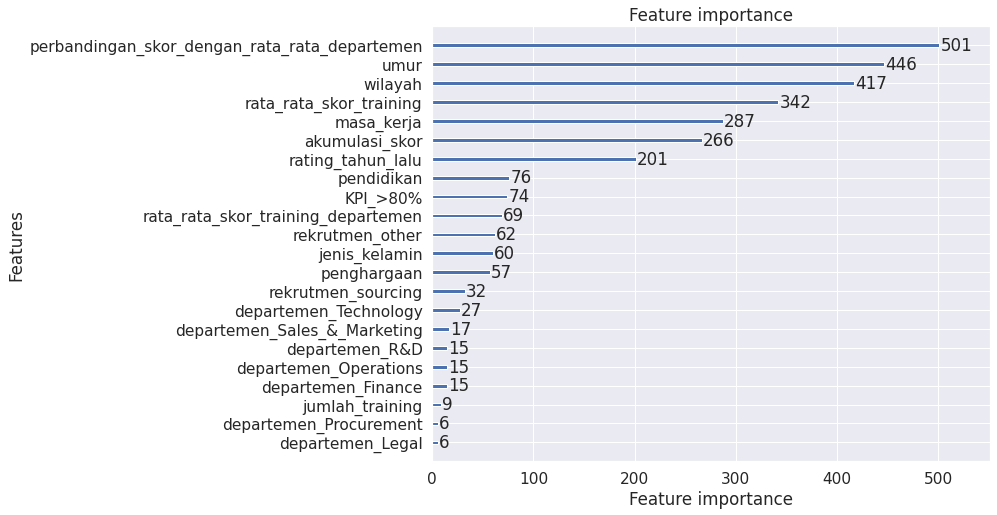

In [70]:
#Check Featue Importance
import lightgbm as lgb
# plot feature importance
fig,ax= plt.subplots(figsize=(10,8))
lgb.plot_importance(lgbm, ax=ax)
plt.show()

## Random Forest

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1868
           1       0.79      0.86      0.82      1867

    accuracy                           0.81      3735
   macro avg       0.82      0.81      0.81      3735
weighted avg       0.82      0.81      0.81      3735



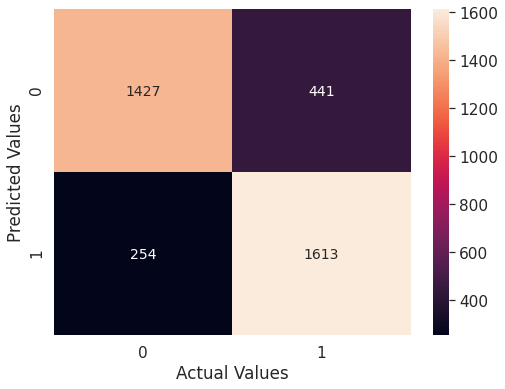

In [71]:
#Build model Random Forest and check confusion matrix
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

In [72]:
#Check accuracy train and test
print('Accuracy train: %.3f'%accuracy_score(y_train, rf.predict(X_train)))
print('Accuracy test: %.3f'%accuracy_score(y_test, y_pred))

Accuracy train: 1.000
Accuracy test: 0.814


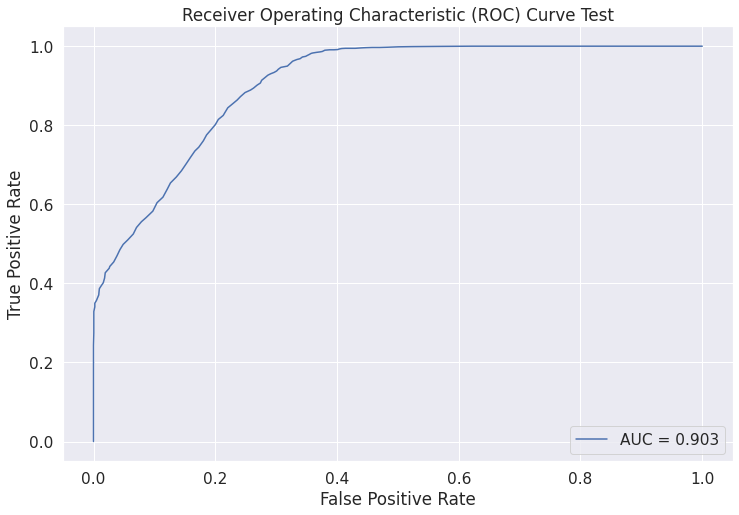

In [73]:
#Check ROC curve and AUC test data
generate_auc_roc_curve(rf, X_test)

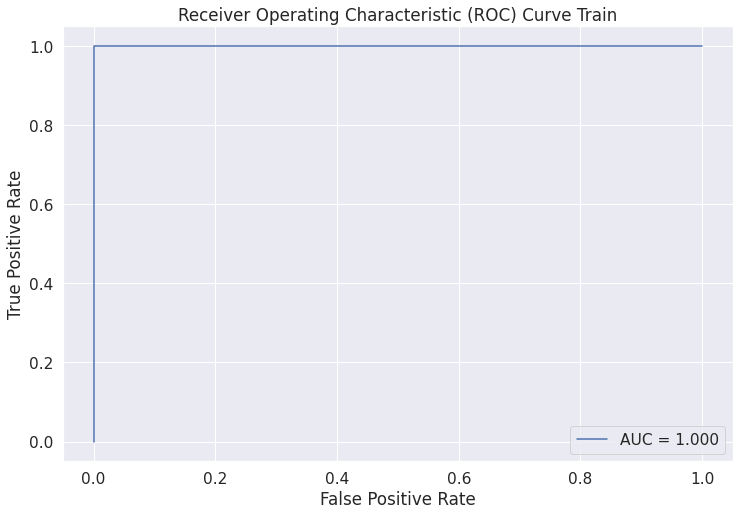

In [74]:
#Check ROC curve and AUC train data
generate_auc_roc_curve_train(rf, X_train)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1868
           1       0.77      0.85      0.81      1867

    accuracy                           0.80      3735
   macro avg       0.80      0.80      0.80      3735
weighted avg       0.80      0.80      0.80      3735



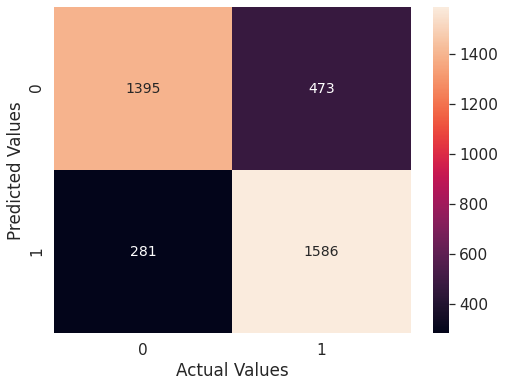

In [75]:
#Build model Logistic Regression and check confusion matrix
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

In [76]:
#Check accuracy train and test
print('Accuracy train: %.3f'%accuracy_score(y_train, logreg.predict(X_train)))
print('Accuracy test: %.3f'%accuracy_score(y_test, y_pred))

Accuracy train: 0.793
Accuracy test: 0.798


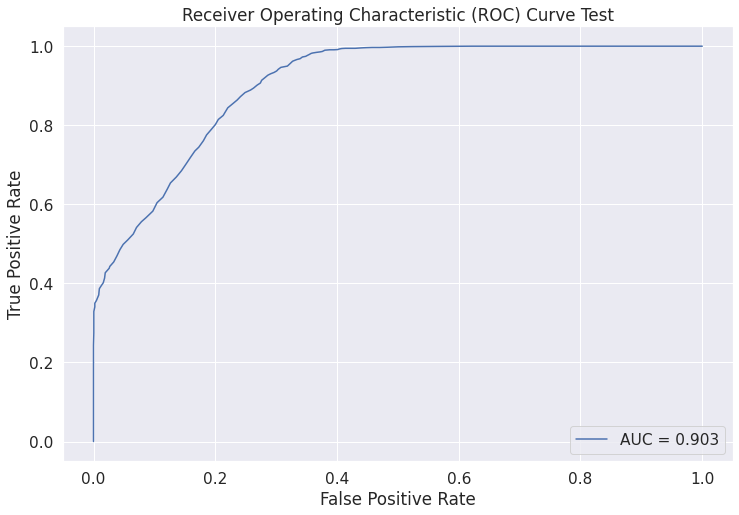

In [77]:
#Check ROC curve and AUC test data
generate_auc_roc_curve(rf, X_test)

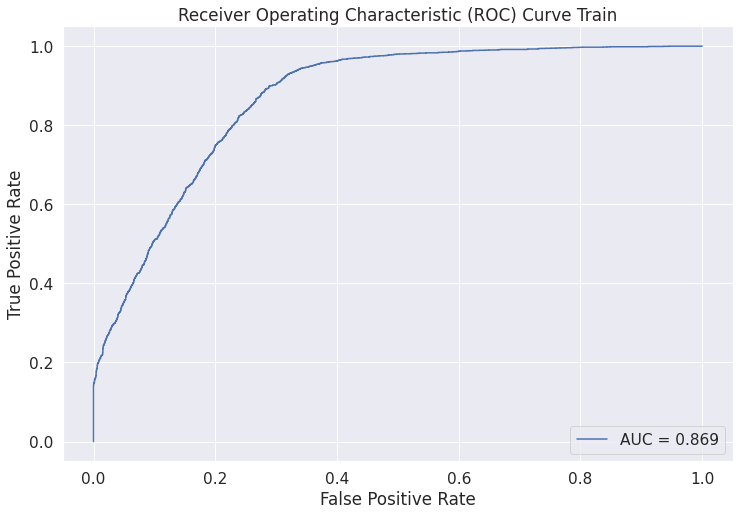

In [78]:
#Check ROC curve and AUC train data
generate_auc_roc_curve_train(logreg, X_train)

## Conclusion from Base Model
Dari base model didapatkan kesimpulan 4 model terbaik<br>


```
Model                AUC-train      AUC-test
XGBoost                0.923          0.908
LightGBM               0.982          0.906
RandomForest           1.000          0.903
Logistic Regression    0.869          0.903       
```
Selanjutnya akan dilakukan hyperparameter tuning dengan menggunakan 3 model terbaik.


# Hyperparameter Tuning

Ketiga model yang akan dituning merupakan tree based model. Setelah mencoba beberapa kali proses tuning, didapatkan 2 parameter yang sebaiknya dituning adalah:
* n_estimators: menjelaskan banyaknya pohon atau tree pada model
* max_depth: jarak antara root node dengan leaf node

## XGBoost - Tuning

In [79]:
#Define parameter distributions
params={
        'n_estimators': [100, 200, 500, 1000, 2000, 2500],
        'max_depth':  [-3, -1 , 3, 4, 5]
        }

In [80]:
#Tuning using RandomizedSearchCV
classifier=XGBClassifier()
xgb_random=RandomizedSearchCV(classifier,param_distributions=params,n_iter=15,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [81]:
#Print best parameters and cv score
print("BEST PARAMETERS: " + str(xgb_random.best_params_))
print("BEST CV SCORE: " + str(xgb_random.best_score_))

BEST PARAMETERS: {'n_estimators': 100, 'max_depth': 5}
BEST CV SCORE: 0.902306876727964


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1868
           1       0.77      0.92      0.84      1867

    accuracy                           0.82      3735
   macro avg       0.83      0.82      0.82      3735
weighted avg       0.83      0.82      0.82      3735



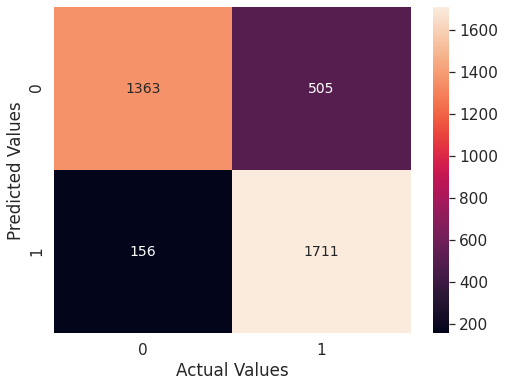

In [82]:
#Check confusion matrix
y_pred = xgb_random.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

In [83]:
#Check accuracy train and test
print('Accuracy train: %.3f'%accuracy_score(y_train, xgb_random.predict(X_train)))
print('Accuracy test: %.3f'%accuracy_score(y_test, y_pred))

Accuracy train: 0.868
Accuracy test: 0.823


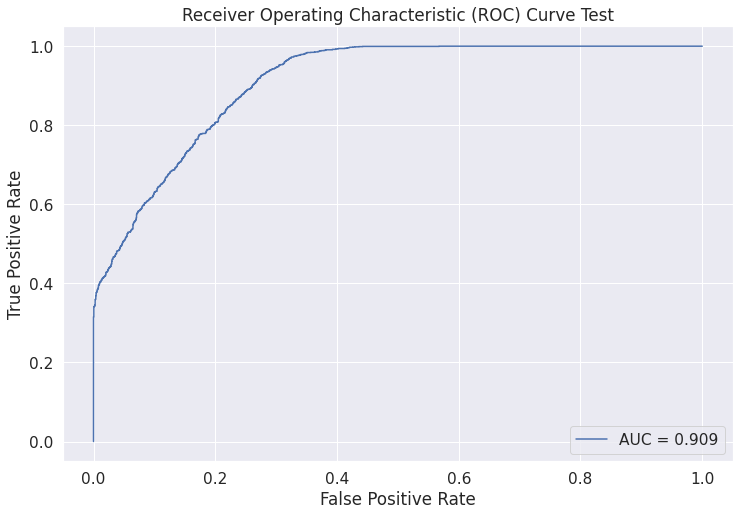

In [84]:
#Check ROC curve and AUC test data
generate_auc_roc_curve(xgb_random, X_test)

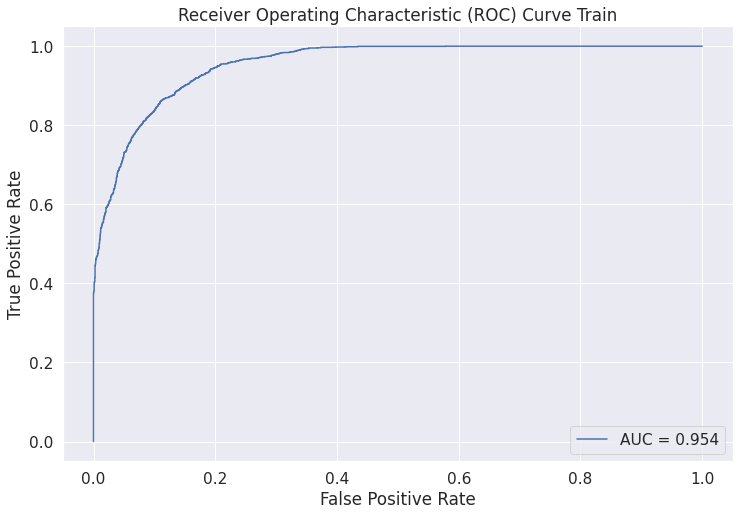

In [85]:
#Check ROC curve and AUC train data
generate_auc_roc_curve_train(xgb_random, X_train)

## LightGBM - Tuning

In [86]:
#Define parameter distributions
params={'n_estimators': [100, 200, 500, 1000, 2000, 2500],
        'max_depth':  [-3, -1 , 4, 5, 9]}

In [87]:
#Tuning using RandomizedSearchCV
classifier=LGBMClassifier()
lgbm_random=RandomizedSearchCV(classifier,param_distributions=params,n_iter=15,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
lgbm_random.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   50.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
                                            subsample_for_bin

In [88]:
#Print best parameters and cv score
print("BEST PARAMETERS: " + str(lgbm_random.best_params_))
print("BEST CV SCORE: " + str(lgbm_random.best_score_))

BEST PARAMETERS: {'n_estimators': 200, 'max_depth': 4}
BEST CV SCORE: 0.90147642693441


              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1868
           1       0.78      0.90      0.83      1867

    accuracy                           0.82      3735
   macro avg       0.83      0.82      0.82      3735
weighted avg       0.83      0.82      0.82      3735



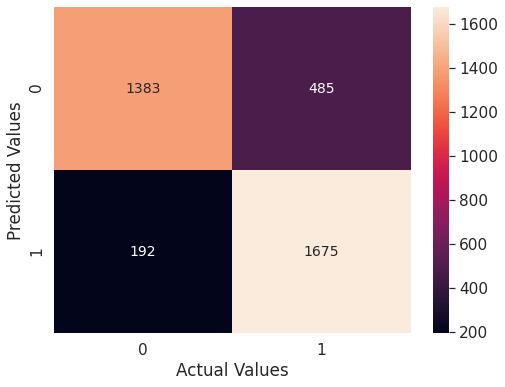

In [89]:
#Check confusion matrix
y_pred = lgbm_random.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

In [90]:
#Check accuracy train and test
print('Accuracy train: %.3f'%accuracy_score(y_train, lgbm_random.predict(X_train)))
print('Accuracy test: %.3f'%accuracy_score(y_test, y_pred))

Accuracy train: 0.876
Accuracy test: 0.819


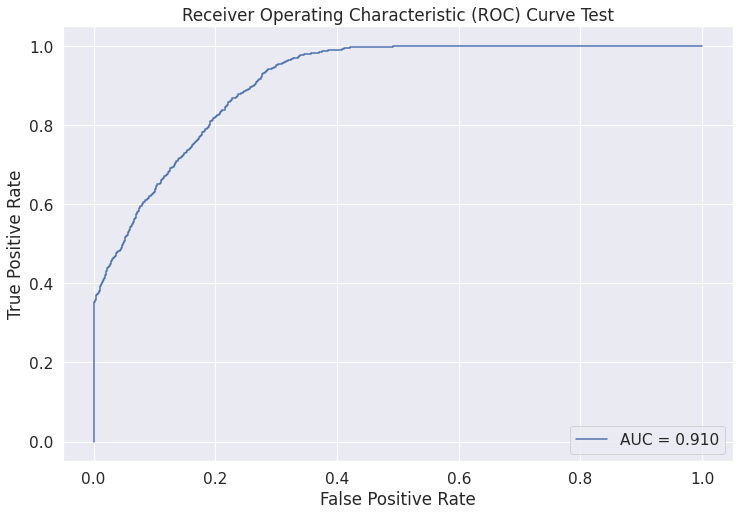

In [91]:
#Check ROC curve and AUC test data
generate_auc_roc_curve(lgbm_random, X_test)

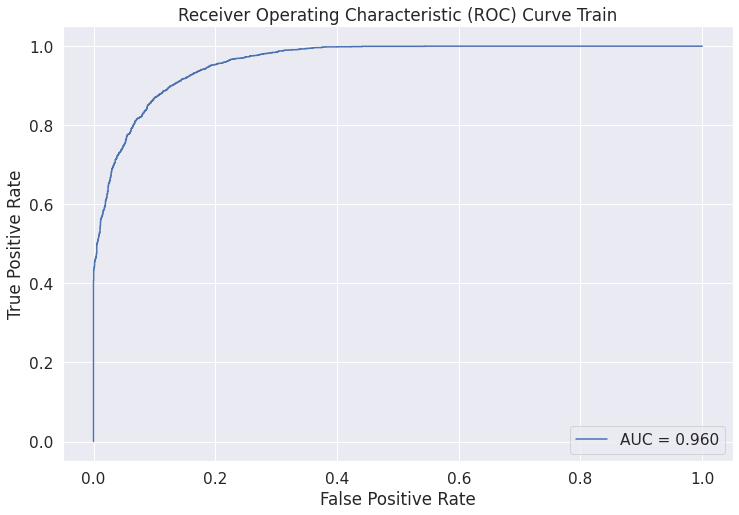

In [92]:
#Check ROC curve and AUC train data
generate_auc_roc_curve_train(lgbm_random, X_train)

## Random Forest - Tuning

In [93]:
#Define parameter distributions
params={'n_estimators': [100, 200, 500, 1000, 2000, 2500],
        'max_depth':  [-3, -1 , 4, 5, 9]
        }

In [94]:
#Tuning using RandomizedSearchCV
classifier=RandomForestClassifier()
rf_random=RandomizedSearchCV(classifier,param_distributions=params,n_iter=15,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [95]:
#Print best parameters and cv score
print("BEST PARAMETERS: " + str(rf_random.best_params_))
print("BEST CV SCORE: " + str(rf_random.best_score_))

BEST PARAMETERS: {'n_estimators': 1000, 'max_depth': 9}
BEST CV SCORE: 0.8994271526792537


              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1868
           1       0.76      0.94      0.84      1867

    accuracy                           0.82      3735
   macro avg       0.84      0.82      0.82      3735
weighted avg       0.84      0.82      0.82      3735



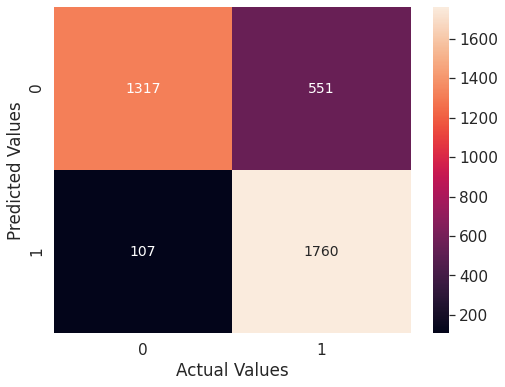

In [96]:
#Check confusion matrix
y_pred = rf_random.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

In [97]:
#Check accuracy train and test
print('Accuracy train: %.3f'%accuracy_score(y_train, rf_random.predict(X_train)))
print('Accuracy test: %.3f'%accuracy_score(y_test, y_pred))

Accuracy train: 0.859
Accuracy test: 0.824


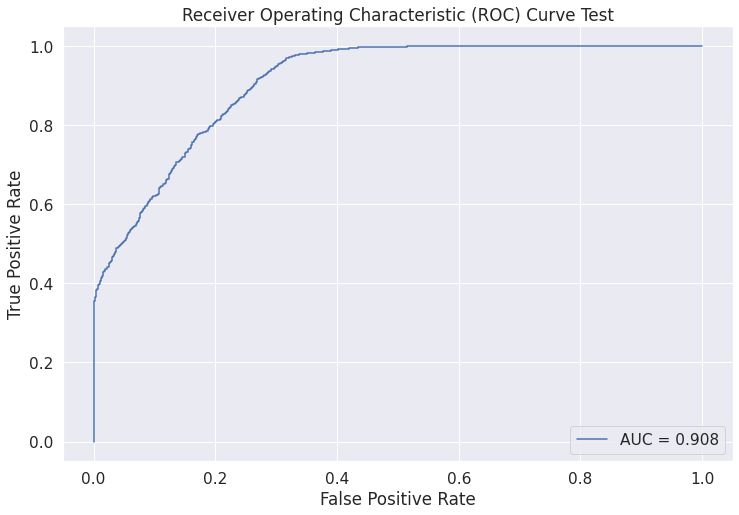

In [98]:
#Check ROC curve and AUC test data
generate_auc_roc_curve(rf_random, X_test)

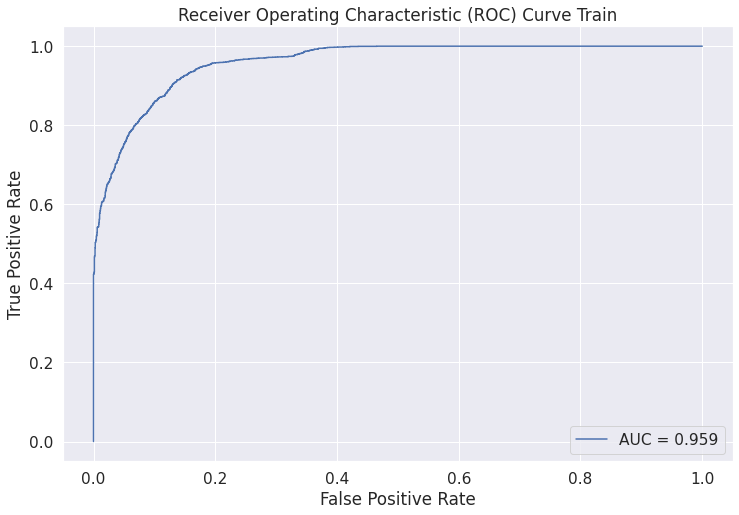

In [99]:
#Check ROC curve and AUC train data
generate_auc_roc_curve_train(rf_random, X_train)

## Conclusion from Hyperparameter Tuning
Untuk mempermudah perbandingan, berikut ini ditampilkan kembali kesimpulan dari base model:<br>
```
Model                AUC-train      AUC-test
XGBoost                0.924          0.909
LightGBM               0.981          0.907
RandomForest           1.000          0.903 
```
Setelah dilakukan hyperparameter tuning didapatkan hasil sebagai berikut:
```
Model                AUC-train      AUC-test
XGBoost                0.954          0.909
LightGBM               0.960          0.910
RandomForest           0.959          0.908      
```
Model yang dipilih adalah LightGBM karena memiliki nilai area under ROC curve paling tinggi dibandingkan model lain. Model LightGBM ini juga sedikit overfit dengan perbedaan nilai AUC train dan test sebesar 5%.


# Deployment Plans and Maintain Lifecycle Models
Model dapat dideploy pada server. Bisa dengan menggunakan cloud (GCP, AWS, Azure) atau pada konvensional server. Untuk menjaga model, dilakukan training ulang model atau model weights-nya ditrain ulang secara berkala setiap tahunnya, karena data-data seperti rating, training, dan lain-lain akan berubah setiap tahunnya.